#  ZOMATO DATA ANALYSIS PROJECT 

# step 1: Import Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 

# Step 2 Create Data frame and read file

In [2]:
df_Zomato = pd.read_csv(r"C:\DATA_Analytics_project_python\Zomato_analysis\Zomato data .csv")

In [3]:
df_Zomato


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [4]:
df_Zomato.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# convert the data type of the "rate" column to float and remove the denominator.

In [5]:
#  create user define function to remove /5 using split 

def  handleRate(value) :
    value = str(value).split('/')
    value = value[0];
    return float(value)

df_Zomato['rate']=df_Zomato['rate'].apply(handleRate)
print(df_Zomato.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [6]:
df_Zomato.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9,47,200,Dining


In [7]:
df_Zomato.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


In [8]:
df_Zomato.describe().columns     #   describe numerical columns 

Index(['rate', 'votes', 'approx_cost(for two people)'], dtype='object')

In [9]:
df_Zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [10]:
list(set(df_Zomato.columns)-set(df_Zomato.describe().columns))    #   describe the catagorical columns in data 

['book_table', 'online_order', 'name', 'listed_in(type)']

# summary of the frame

In [11]:
df_Zomato.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Conclusion: There is no null value in data 

# Type of Restutant

In [12]:
df_Zomato.shape

(148, 7)

In [13]:
df_Zomato.size

1036

In [14]:
# The nunique() method returns the number of unique values of each column.
# syntax :  dataframe.nunique(axis, dropna)

df_Zomato.nunique()

name                           145
online_order                     2
book_table                       2
rate                            19
votes                           90
approx_cost(for two people)     18
listed_in(type)                  4
dtype: int64

# Type of resurant

In [15]:
df_Zomato.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of Resturant')

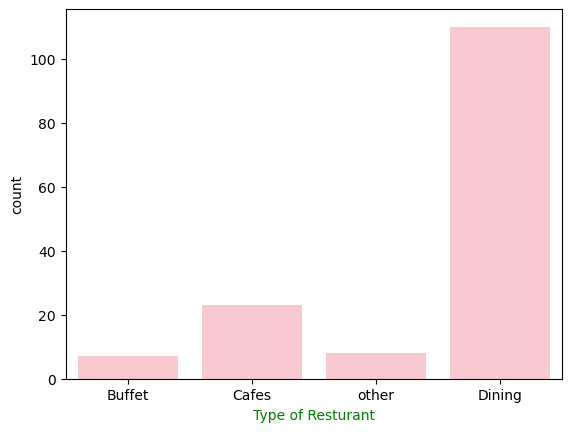

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=df_Zomato['listed_in(type)'], color="pink")
plt.xlabel("Type of Resturant", color="green")

#  Conclusion:  Maximum of the resutantt falls in dinning category

# Dining resutants are preferred by a larger numbers of individuals.

In [17]:
df_Zomato.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [18]:
df_Zomato                 

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


Text(0, 0.5, 'Votes')

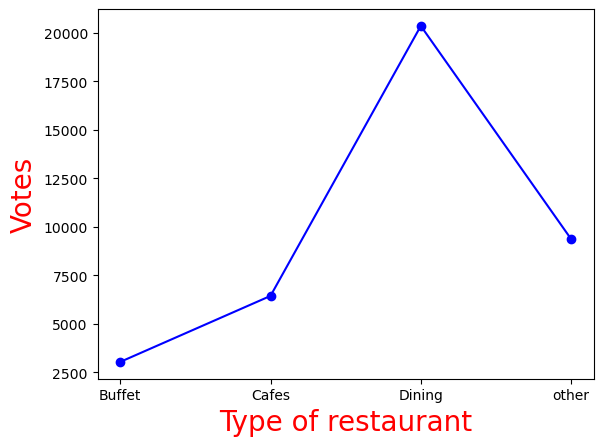

In [28]:
grouped_data = df_Zomato.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="blue", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)



#  Conclusion: Dining restaurants has recived maximum votes

In [20]:
df_Zomato.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


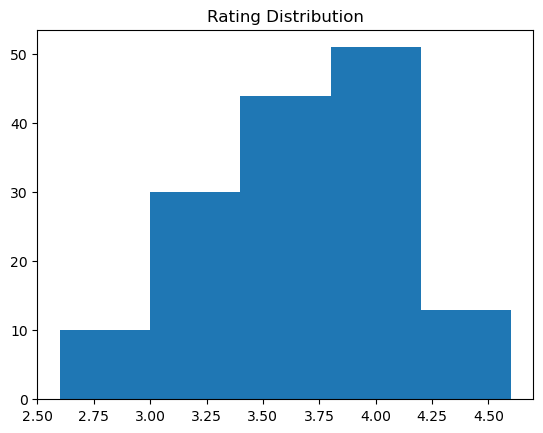

In [21]:
plt.hist(df_Zomato['rate'],bins=5)
plt.title("Rating Distribution")
plt.show()

# Conclusion: The majority of resturants received ratings from 3.5 to 4.


#  Average orders Spending by couples 

In [22]:
df_Zomato.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

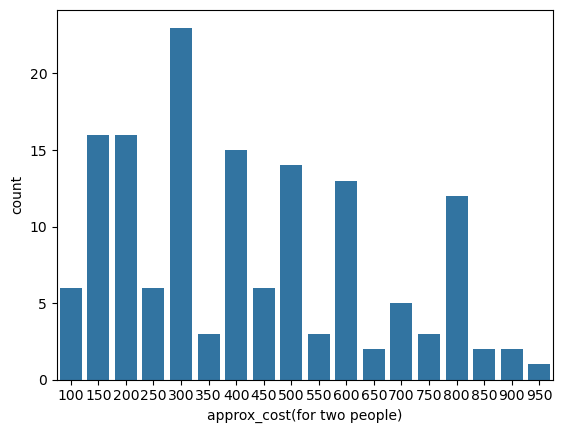

In [23]:
couple_data = df_Zomato['approx_cost(for two people)']
sns.countplot(x=couple_data)

#  The majority of couples prefer restaurants with an approximate cost of 300 rupees.



In [24]:
df_Zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

<Axes: xlabel='online_order', ylabel='rate'>

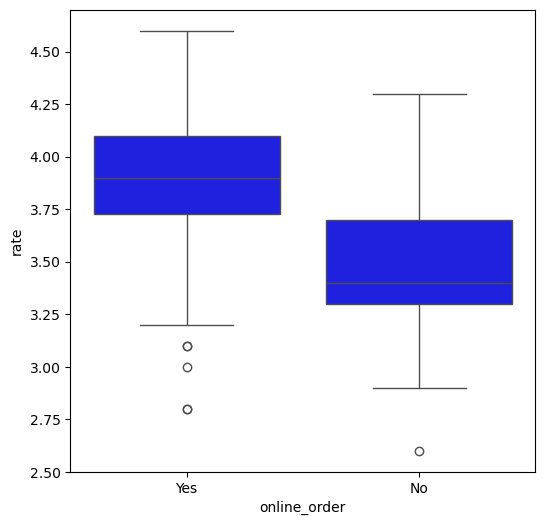

In [42]:
plt.figure(figsize = (6,6))
color = ['#0000FF', '#00FF00']
sns.boxplot(x = 'online_order', y ='rate', data = df_Zomato, color= "#0000FF")

#  whether online orders receive higher ratings than offline orders

# Conclusion: offline orders received lower rating in comparison to online orders, which obtained excellent ratings.

In [26]:
df_Zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

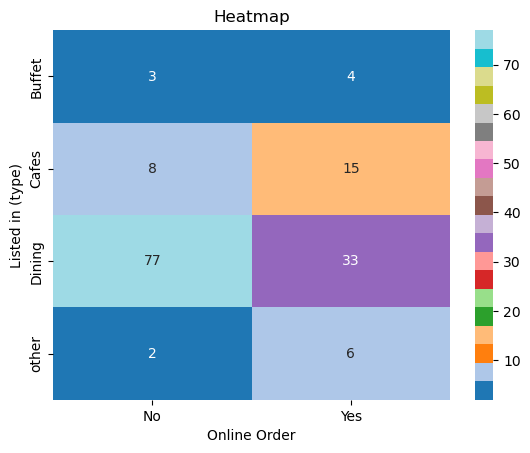

In [35]:
pivot_table = df_Zomato.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc='size', fill_value=0)
cmap = "tab20"
sns.heatmap(pivot_table, annot=True, cmap=cmap, fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed in (type)")
plt.show()

# Conclusion : Dining restaurants primarily accept offline orders, whereas cafes primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at resturants, but prefer online ordering at cafes.